In [66]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [67]:
img=cv2.imread('frog.jpg')

In [68]:
img.shape

(408, 612, 3)

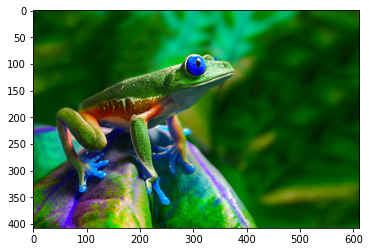

In [69]:
plt.imshow(img)

In [70]:
#bgr to rgb conversion
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

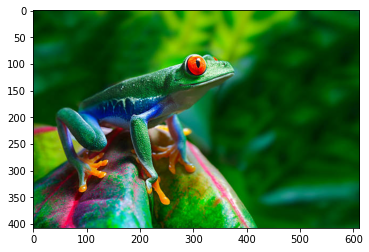

In [71]:
plt.imshow(img)

In [72]:
x=img.reshape((-1,3))# we are getting number of rows here (pixels)

In [73]:
print(x.shape)

(249696, 3)


In [74]:
k=15 #top k dominant colors
model=KMeans(n_clusters=k)
model.fit(x)

KMeans(n_clusters=15)

In [75]:
centroids=model.cluster_centers_

In [76]:
print(centroids)

[[124.45663803 185.24217864   7.34568001]
 [  1.67034872  84.75582303   9.61991734]
 [197.49283371 156.42790537 146.51839061]
 [ 25.3122436  149.65566597 116.78448354]
 [171.27418448  48.90241845  37.61304837]
 [ 59.82894063  45.49035123  25.74537485]
 [ 10.75466893 140.68056027   6.86663837]
 [ 73.08483896 157.56146897   4.7369403 ]
 [106.44279131 184.61724819 172.98288348]
 [  1.4967844   56.01557159   2.90511457]
 [ 99.0791313   85.07950574  88.61482776]
 [  9.9085677  104.8420553   60.99703335]
 [195.75959368 217.55398796 210.60985704]
 [229.54850575 139.30482759  15.80781609]
 [ 17.27235236  50.08858463  98.53150775]]


In [77]:
colors=np.array(centroids, dtype='uint8')
#[0-255] as rgb values are in this range

In [78]:
print(colors)

[[124 185   7]
 [  1  84   9]
 [197 156 146]
 [ 25 149 116]
 [171  48  37]
 [ 59  45  25]
 [ 10 140   6]
 [ 73 157   4]
 [106 184 172]
 [  1  56   2]
 [ 99  85  88]
 [  9 104  60]
 [195 217 210]
 [229 139  15]
 [ 17  50  98]]


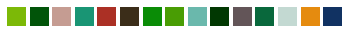

In [79]:
#color patch (100,100,3)
i=1
for color in colors:
    plt.subplot(1,k,i)
    plt.axis('off')
    i=i+1
    mat=np.zeros((100,100,3),dtype='uint8')
    mat[:,:,:]=color
    plt.imshow(mat)
plt.show()

image generation by k dominant colors i.e Replacing all points of the cluster by the cluster center i.e dominant color

In [80]:
np.unique(model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [81]:
new_img=np.zeros((x.shape), dtype='uint8')
print(new_img.shape)#flatterned image where each row represents the pixel of the image

(249696, 3)


In [82]:
for i  in range(new_img.shape[0]):
    new_img[i]=colors[model.labels_[i]]
    

In [83]:
# m x 3 -> r x c x 3
new_img=new_img.reshape(img.shape)

In [84]:
print(new_img.shape)

(408, 612, 3)


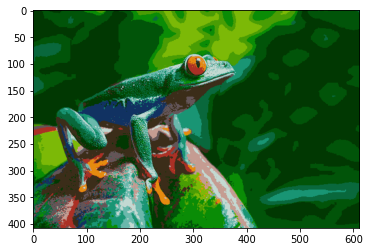

In [85]:
plt.imshow(new_img)